# Predicting the Price of a House Based on Various Predictors

### Introduction

It is no secret that the price of housing in the United States has skyrocketed in the past decade. Homeowners are continuously struggling to find a suitable home for their specific needs, that is within their personal budget. In this data science project, we are trying to determine:

Is it possible to predict the cost of a house based on area, number of bedrooms, number of bathrooms and number of stories?

The dataset being used for this analysis is called: Housing Prices Dataset which was obtained from Kaggle and contains data from 2021. The original dataset contained 13 columns, 1 of which is the price.


### Preliminary Exploratory Data Analysis
Below we have gotten our data from the web onto R, and have split our data in to training and testing data, with a 75/25 ratio

In [3]:
library(tidyverse)
library(repr)
library(tidymodels)

set.seed(9999)


Housing <- read_csv("https://raw.githubusercontent.com/jio7887oij/dsci-100-009-1/main/Housing.csv")

housing_split <- initial_split(Housing, prop = 0.75, strata = price)
housing_train <- training(housing_split)
housing_test <- testing(housing_split)
housing_train_visualization <- head(housing_train, n = 20)
housing_train_visualization

Rows: 545 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): mainroad, guestroom, basement, hotwaterheating, airconditioning, pr...
dbl (6): price, area, bedrooms, bathrooms, stories, parking

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
3430000,4000,2,1,1,yes,no,no,no,no,0,no,unfurnished
3430000,3185,2,1,1,yes,no,no,no,no,2,no,unfurnished
3430000,3850,3,1,1,yes,no,no,no,no,0,no,unfurnished
3430000,2145,3,1,3,yes,no,no,no,no,0,yes,furnished
3430000,1950,3,2,2,yes,no,yes,no,no,0,yes,unfurnished
3423000,4040,2,1,1,yes,no,no,no,no,0,no,unfurnished
3395000,4785,3,1,2,yes,yes,yes,no,yes,1,no,furnished
3395000,3640,2,1,1,yes,no,no,no,no,0,no,furnished
3360000,3500,4,1,2,yes,no,no,no,yes,2,no,unfurnished


Below are scatter plots and bar graphs comparing the initial dataset with the predictors

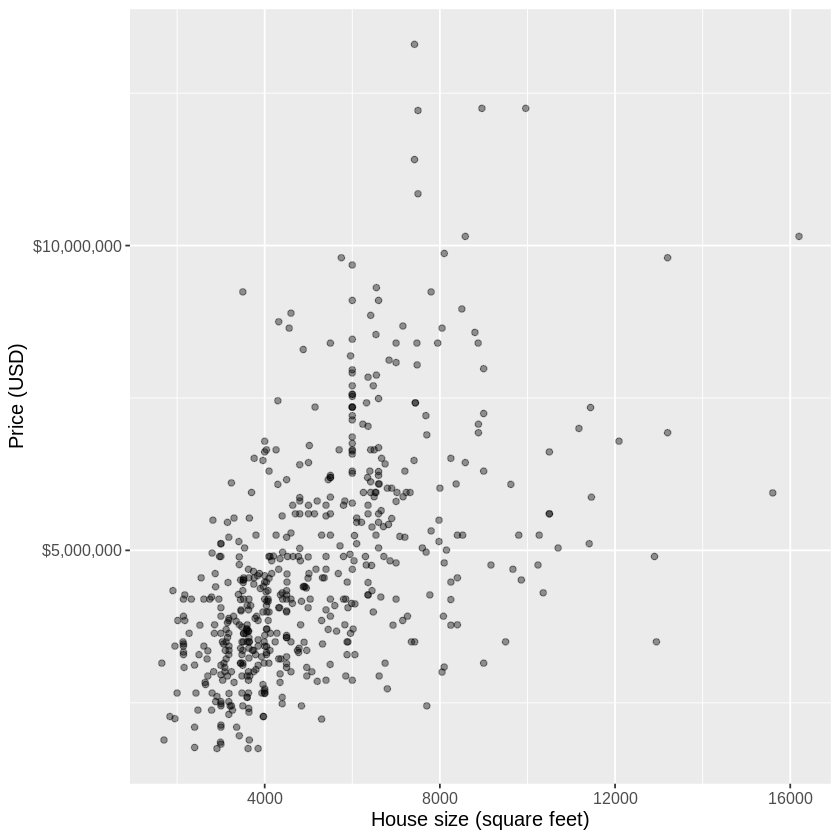

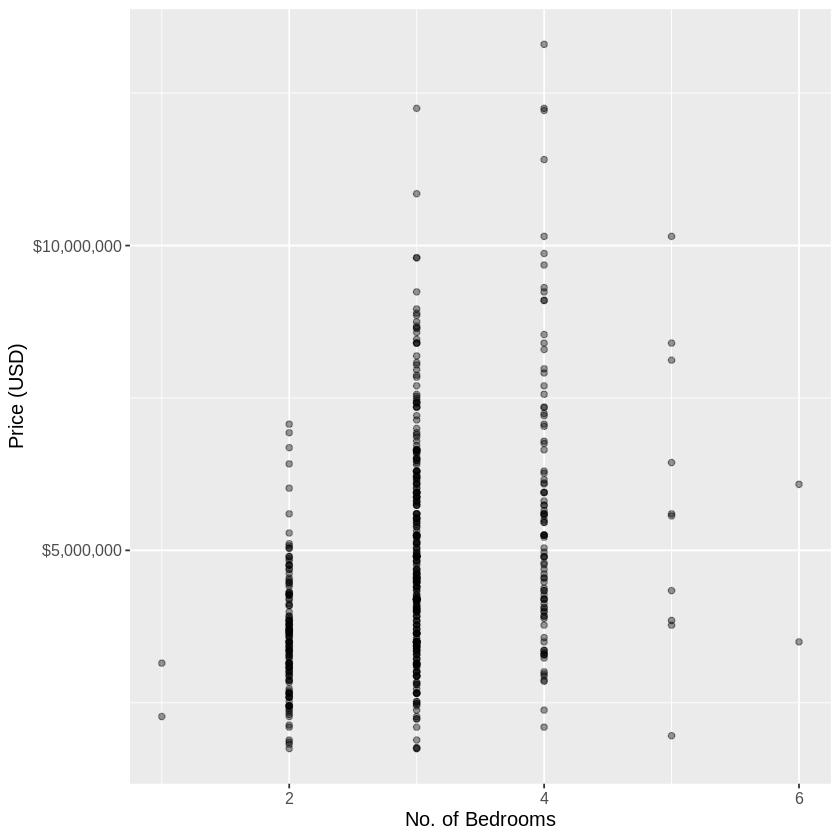

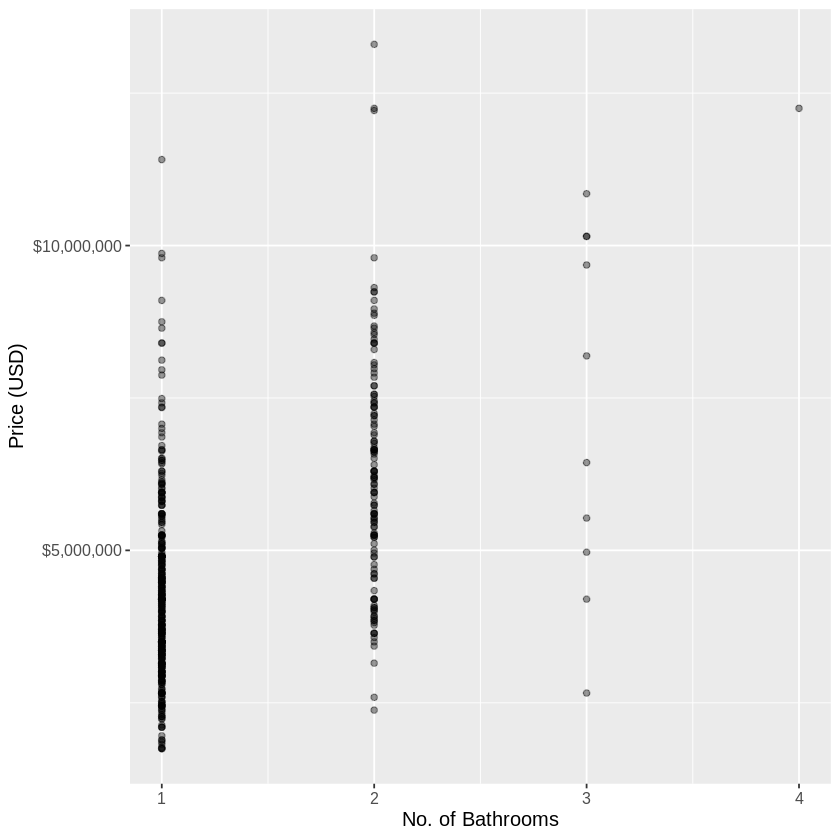

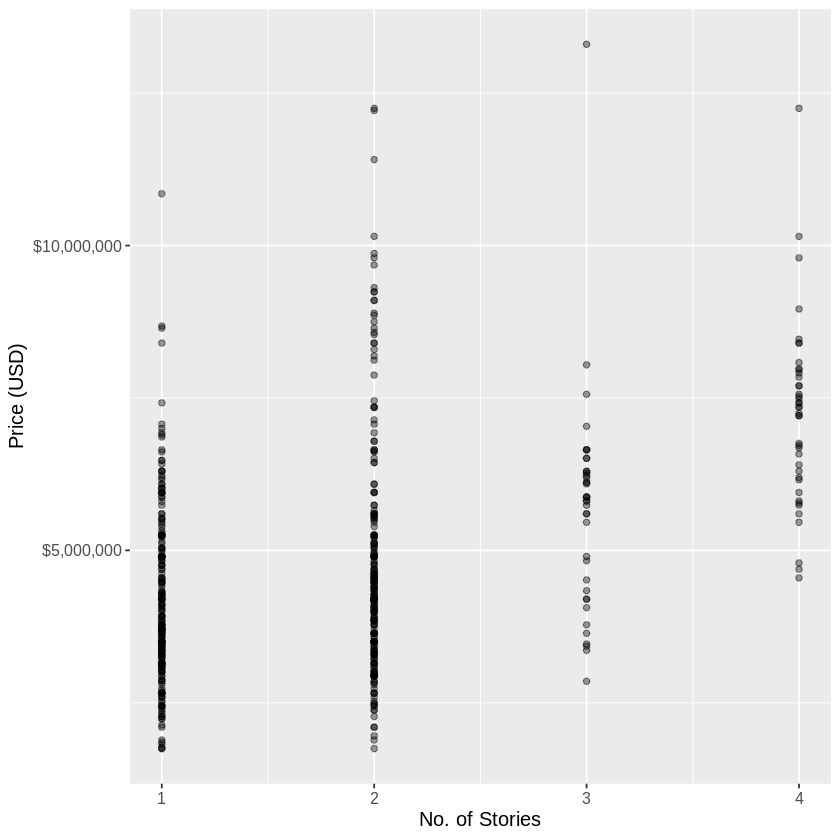

In [5]:
set.seed(9999)
preview_1 <- ggplot(Housing, aes(x = area, y = price)) +
  geom_point(alpha = 0.4) +
  xlab("House size (square feet)") +
  ylab("Price (USD)") +
  scale_y_continuous(labels = dollar_format()) + 
  theme(text = element_text(size = 12))

preview_1

preview_2 <- ggplot(Housing, aes(x = bedrooms, y = price)) +
  geom_point(alpha = 0.4) +
  xlab("No. of Bedrooms") +
  ylab("Price (USD)") +
  scale_y_continuous(labels = dollar_format()) + 
  theme(text = element_text(size = 12))

preview_2

preview_3 <- ggplot(Housing, aes(x = bathrooms, y = price)) +
  geom_point(alpha = 0.4) +
  xlab("No. of Bathrooms") +
  ylab("Price (USD)") +
  scale_y_continuous(labels = dollar_format()) + 
  theme(text = element_text(size = 12))

preview_3

preview_4 <- ggplot(Housing, aes(x = stories, y = price)) +
  geom_point(alpha = 0.4) +
  xlab("No. of Stories") +
  ylab("Price (USD)") +
  scale_y_continuous(labels = dollar_format()) + 
  theme(text = element_text(size = 12))

preview_4

In [14]:
set.seed(9999)
lm_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression")

lm_recipe <- recipe(price ~ area + bathrooms + bedrooms + stories, data = housing_train)

lm_fit <- workflow() |>
    add_recipe(lm_recipe) |>
    add_model(lm_spec) |>
    fit(data = housing_train)

lm_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)         area    bathrooms     bedrooms      stories  
    90105.3        328.2    1180035.7     157429.7     540625.0  


In [15]:
set.seed(9999)
lm_test_results <- lm_fit |>
    predict(housing_test) |>
    bind_cols(housing_test) |>
    metrics(truth = price, estimate = .pred)

lm_test_results

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.345328e+06
rsq,standard,6.194765e-01
mae,standard,9.762118e+05


In [18]:
mcoeffs <- lm_fit |>
    extract_fit_parsnip() |>
    tidy()
mcoeffs

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),90105.3417,281764.12591,0.319790,7.492937e-01
area,328.2401,30.70547,10.689958,1.212328e-23
bathrooms,1180035.7342,139963.84325,8.431004,6.201709e-16
bedrooms,157429.7484,95714.54775,1.644784,1.007961e-01
stories,540624.9532,78462.59477,6.890225,2.160672e-11


In [13]:
prediction_grid <- tibble(
    prediction = c(
        Housing |> select(area) |> min(),
        Housing |> select(area, bathrooms, bedrooms, stories) |> max()
        )
    )

area_preds <- lm_fit |>
    predict(prediction_grid) |>
    bind_cols(prediction_grid)

area_plot_final <- ggplot(Housing, aes(x = area, y = price)) +
    geom_point(alpha = 0.4) +
    geom_line(data = area_preds,
              mapping = aes(x = area, y = .pred),
              color = "blue") +
    xlab("Area of House") +
    ylab("Price (USD)") +
    scale_y_continuous(labels = dollar_format()) +
    theme(text = element_text(size = 12))

area_plot_final

ERROR: [1m[33mError[39m in `validate_column_names()`:[22m
[33m![39m The following required columns are missing: 'area', 'bathrooms', 'bedrooms', 'stories'.
